In [7]:
#Question 4.1
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))

In [24]:
#Question 4.2
from sklearn.model_selection import train_test_split
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(X, y, test_size=0.20)
print (" Training Dataset X Shape : ",data_X_train.shape)
print (" Test Dataset X Shape : ",data_X_test.shape)
print (" Training Dataset Y Shape : ",data_Y_train.shape)
print (" Test Dataset Y Shape : ",data_Y_test.shape)

 Training Dataset X Shape :  (240, 2)
 Test Dataset X Shape :  (60, 2)
 Training Dataset Y Shape :  (240,)
 Test Dataset Y Shape :  (60,)


In [32]:
#Question 4.3
#Perform batch SGD using backprop
def Classifier(X,y):
    #Perform batch SGD using backprop
    D = X.shape[1] #Number of features
    K = 3 #Number of classes assuming class index starts from 0

    # Start with an initialize parameters randomly


    # Initial values from hyperparameter
    reg = 0.2 # regularization strength
    np.random.seed(1234)
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))

    #For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]

    #Initial value for the Gradient Descent Parameter
    step_size = 0.01 #Also called learning rate

    #For simplicity, we will not hand tune this algorithm parameter as well.

    # gradient descent loop
    for i in range(500):
  
        # evaluate class scores, [N x K]
        scores = np.dot(X, W) + b 
  
        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        #if i % 10 == 0:
            #print "iteration %d: loss %f" % (i, loss)
  
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    return(W,b)

In [47]:
#Question 4.3
W1,b1=Classifier(data_X_train,data_Y_train)
train_scores=np.dot(data_X_train,W1) + b1
test_scores = np.dot(data_X_test, W1) + b1
predicted_class_train = np.argmax(train_scores, axis=1)
predicted_class_test = np.argmax(test_scores, axis=1)
print ('Train accuracy: %.2f' % (np.mean(predicted_class_train == data_Y_train)*100))
Test_Acc=(np.mean(predicted_class_test == data_Y_test)*100)
print ('Test accuracy: %.2f' % Test_Acc)

Train accuracy: 55.00
Test accuracy: 55.00


In [48]:
#Question 4.4
from sklearn import cross_validation
cv = cross_validation.KFold(len(X), n_folds=10,shuffle=True, random_state=None)
#print(cv)
#Define some local varaibles
D = X.shape[1] #Number of features
K = 3 #Number of classes assuming class index starts from 0

# Start with an initialize parameters randomly


# Initial values from hyperparameter
reg = 1e-3 # regularization strength


result=[]

for traincv,testcv in cv:
   
    X_train, X_test = X[traincv], X[testcv]
    y_train, y_test = y[traincv], y[testcv]
    W1,b1=Classifier(X_train,y_train)
       #print(type(X[testcv]))
    #print(W1,b1)
    
    scores = np.dot(X_test, W1) + b1
    predicted_class = np.argmax(scores, axis=1)
    result.append(np.mean(predicted_class == y_test))
print ("Validation Accuracy: %.2f" % (np.array(result).mean()*100))
print ("Test Accuracy: %.2f" % Test_Acc) 


Validation Accuracy: 51.33
Test Accuracy: 55.00


In [50]:
#Question 4.5
def classifier1(X,y,s,r,g_iter):
    #Perform batch SGD using backprop
    D = X.shape[1] #Number of features
    K = 3 #Number of classes assuming class index starts from 0

    # Start with an initialize parameters randomly

    
    # Initial values from hyperparameter
    reg = r # regularization strength
    
    np.random.seed(1234)
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
#For simplicity we will take the batch size to be the same as number of examples
    num_examples = X.shape[0]
    
    #Initial value for the Gradient Descent Parameter
    step_size = s #Also called learning rate

    #For simplicity, we will not hand tune this algorithm parameter as well.

    # gradient descent loop
    for i in range(g_iter):
  
    # evaluate class scores, [N x K]
        scores = np.dot(X, W) + b 
  
    # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        #if i % 10 == 0:
            #print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
  
        dW += reg*W # regularization gradient
  
    # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    
    return(W,b)

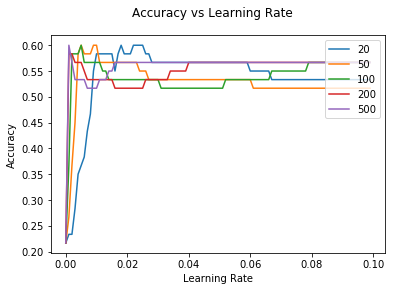

In [52]:

regu_rate=[]
result=[]
W1=[]
b1=[]
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
giter=[20,50,100,200,500]
for j in giter[:]:
    learning_rate=[]
    result=[]
    for i in range(100):
        learning_rate.append(0.001*i)
        W1,b1= classifier1(data_X_train,data_Y_train,0.001*i,0.5,j)
        scores = np.dot(data_X_test, W1) + b1
        predicted_class = np.argmax(scores, axis=1)
        result.append(np.mean(predicted_class == data_Y_test))    
    plt.plot(learning_rate,result)
plt.suptitle('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(['20', '50', '100', '200','500'], loc='upper right')
plt.show()


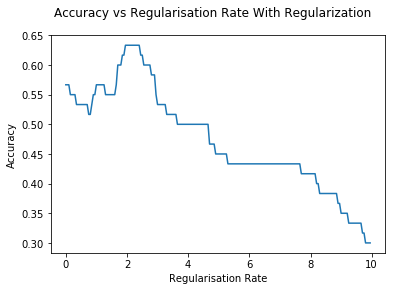

Best Accuracy with Regularization parameter  : 63.33 
Best Regularization parameter with Regularization parameter : 1.95000
Best Accuracy without Regularization parameter  : 56.67 


In [74]:
#Question 4.6
accuracy=[]
learning_rate=[]
regu_rate=[]
resultl=[]
W1=[]
b1=[]
resultr=[]
for j in range(200):
    regu_rate.append(0.05*j)
    W1,b1= classifier1(data_X_train,data_Y_train,0.01,0.05*j,200)
    scores1 = np.dot(data_X_test, W1) + b1
    predicted_class = np.argmax(scores1, axis=1)
    resultr.append(np.mean(predicted_class == data_Y_test))
plt.plot(regu_rate,resultr)
plt.suptitle('Accuracy vs Regularisation Rate With Regularization')
plt.xlabel('Regularisation Rate')
plt.ylabel('Accuracy')
plt.show()
max_acc=max(resultr)
index=resultr.index(max_acc)
print ("Best Accuracy with Regularization parameter  : %.2f " % (max_acc*100))
print ("Best Regularization parameter with Regularization parameter : %.5f" % regu_rate[index])
resultr1=[]
for j1 in range(200):
    W2,b2= classifier1(data_X_train,data_Y_train,0.01,0,200)
    scores2 = np.dot(data_X_test, W2) + b2
    predicted_class2 = np.argmax(scores2, axis=1)
    resultr1.append(np.mean(predicted_class2 == data_Y_test))
max_acc1=max(resultr1)
index1=resultr1.index(max_acc1)
print ("Best Accuracy without Regularization parameter  : %.2f " % (max_acc1*100))


In [77]:
#Question 4.7
data_X_train50, data_X_test50, data_Y_train50, data_Y_test50 = train_test_split(X, y, test_size=0.50)
W1_50,b1_50=Classifier(data_X_train50,data_Y_train50)
train_scores50=np.dot(data_X_train50,W1_50) + b1_50
test_scores50 = np.dot(data_X_test50, W1_50) + b1_50
predicted_class_train50 = np.argmax(train_scores50, axis=1)
predicted_class_test50 = np.argmax(test_scores50, axis=1)
print (' Train accuracy with 50:50 split: %.2f' % (np.mean(predicted_class_train50 == data_Y_train50)*100))
Test_Acc50=(np.mean(predicted_class_test50 == data_Y_test50)*100)
print (' Test accuracy with 50:50 split: %.2f' % Test_Acc50)

 Train accuracy with 50:50 split: 64.67
 Test accuracy with 50:50 split: 57.33
